### Can start here: import data below

In [1]:
import pandas as pd
chunksize = 100

list_of_dataframes = []

for df in pd.read_csv('MeanImputedScaledData.csv', chunksize=chunksize, index_col=0):
    list_of_dataframes.append(df)

result = pd.concat(list_of_dataframes)
df = result
df

AX-574114010  AX-564298109  AX-564298112  AX-574114011  AX-574114014  \
ID                                                                             
B-1000           0.0           0.0           0.0           0.0       1.61819   
B-1002           0.0           0.0           0.0           0.0       2.00000   
B-1003           0.0           0.0           0.0           1.0       1.00000   
B-1005           0.0           0.0           0.0           2.0       2.00000   
B-1006           0.0           0.0           0.0           2.0       2.00000   
...              ...           ...           ...           ...           ...   
Y_988            0.0           0.0           0.0           1.0       1.61819   
Y_991            1.0           1.0           0.0           0.0       2.00000   
Y_992            0.0           0.0           0.0           1.0       1.00000   
Y_995            0.0           0.0           0.0           0.0       2.00000   
Y_998            2.0           2.0           0.0           0.0       2.00000   

        AX-563423214  AX-575660822  AX-577073921  AX-564298209  AX-564298216  \
ID                                                                             
B-1000           0.0           0.0           0.0           0.0           0.0   
B-1002           0.0           0.0           2.0           2.0           0.0   
B-1003           0.0           0.0           0.0           1.0           0.0   
B-1005           0.0           0.0           2.0           1.0           0.0   
B-1006           0.0           0.0           2.0           2.0           0.0   
...              ...           ...           ...           ...           ...   
Y_988            0.0           0.0           1.0           0.0           0.0   
Y_991            0.0           0.0           0.0           0.0           0.0   
Y_992            0.0           0.0           2.0           0.0           0.0   
Y_995            0.0           0.0           0.0           0.0           0.0   
Y_998            0.0           0.0           0.0           0.0           0.0   

        ...  AX-574130077  AX-574130060  AX-574130061  AX-574130062       Pop  \
ID      ...                                                                     
B-1000  ...           0.0           0.0           0.0           0.0  Training   
B-1002  ...           0.0           0.0           0.0           0.0  Training   
B-1003  ...           0.0           0.0           0.0           0.0  Training   
B-1005  ...           0.0           0.0           0.0           0.0  Training   
B-1006  ...           0.0           0.0           0.0           0.0  Training   
...     ...           ...           ...           ...           ...       ...   
Y_988   ...           0.0           0.0           0.0           0.0  Training   
Y_991   ...           0.0           0.0           0.0           0.0  Training   
Y_992   ...           0.0           0.0           0.0           0.0  Training   
Y_995   ...           0.0           0.0           0.0           0.0  Training   
Y_998   ...           0.0           0.0           0.0           0.0  Training   

        Plate  Status    WWt   Group  Generation  
ID                                                
B-1000   RU11     0.0    NaN      F0          F0  
B-1002   RU10     0.0    NaN      F0          F0  
B-1003   RU10     0.0    NaN      F0          F0  
B-1005   RU11     0.0    NaN      F0          F0  
B-1006   RU10     1.0    NaN      F0          F0  
...       ...     ...    ...     ...         ...  
Y_988    RU28     1.0  12.73  FLGS23          F2  
Y_991    RU28     1.0  11.30  FLGS23          F2  
Y_992    RU28     0.0   9.48  FLGS23          F2  
Y_995    RU28     1.0   7.81  FLGS23          F2  
Y_998    RU28     1.0  10.54  FLGS23          F2  

[2423 rows x 65899 columns]

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ax_columns = [col for col in df.columns if col.startswith('AX')]
# len(ax_columns)
X = df[ax_columns]
y = df["Status"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
    
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Support Vector Machine

In [ ]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

svm_preds = svm_model.predict(X_test_scaled)

print("SVM Results:")
print(classification_report(y_test, svm_preds))
print("Accuracy:", accuracy_score(y_test, svm_preds))

In [ ]:
# Confusion matrix for SVM
cm_svm = confusion_matrix(y_test, svm_preds)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
## grid search
import numpy as np

C_values = [0.1, 1, 10, 100]
gamma_values = ['scale', 'auto', 0.01, 0.1, 1]

accuracy_matrix = np.zeros((len(C_values), len(gamma_values)))

for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        model = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
        accuracy_matrix[i, j] = accuracy_score(y_test, preds)

plt.figure(figsize=(8, 6))
sns.heatmap(accuracy_matrix, annot=True, fmt=".3f",
            xticklabels=gamma_values, yticklabels=C_values,
            cmap="viridis")
plt.title("SVM Accuracy for Different C and Gamma")
plt.xlabel("Gamma")
plt.ylabel("C")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    # 'C': [0.1, 1, 10, 100],
    # 'gamma': ['scale', 1, 0.1, 0.01],
    'kernel': ['rbf']
    # 'degree': [2, 3, 4]
}


model = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=3, n_jobs=1)

grid_search.fit(X_train_scaled, y_train)
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test_scaled)

# Evaluate the final model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set with best model: {test_accuracy}")

### Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # no scaling needed

rf_preds = rf_model.predict(X_test)

print("\nRandom Forest Results:")
print(classification_report(y_test, rf_preds))
print("Accuracy:", accuracy_score(y_test, rf_preds))

In [ ]:
# Confusion matrix for RF
cm_rf = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
## grid search
import numpy as np

n_estimators_list = [50, 100, 200, 500]
max_depth_list = [None, 10, 20, 50]

accuracy_matrix = np.zeros((len(n_estimators_list), len(max_depth_list)))

for i, n_estimators in enumerate(n_estimators_list):
    for j, max_depth in enumerate(max_depth_list):
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=42,
            n_jobs=-1
        )
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
        accuracy_matrix[i, j] = accuracy_score(y_test, preds)

plt.figure(figsize=(10, 6))
sns.heatmap(accuracy_matrix, annot=True, fmt=".3f",
            xticklabels=[str(d) for d in max_depth_list],
            yticklabels=n_estimators_list,
            cmap="viridis")
plt.title("Random Forest Accuracy\n(n_estimators vs. max_depth)")
plt.xlabel("max_depth")
plt.ylabel("n_estimators")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}

rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_clf,  
                           param_grid=param_grid,  
                           cv=5,             
                           scoring='accuracy',  
                           n_jobs=-1,        
                           verbose=3)        

grid_search.fit(X_train_scaled, y_train)
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test_scaled)

# Evaluate the final model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set with best model: {test_accuracy}")


### Attempted dimensionality reduction

Use PCA with 100 components + variance threshold

In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
X_filtered = selector.fit_transform(X)
print(X_filtered.shape)
pca = PCA(n_components=200) 
X_filtered = pca.fit_transform(X_filtered)
X_filtered.shape


In [ ]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_filtered, y, test_size=0.2, stratify=y, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train_red, y_train_red)
rf_preds = rf.predict(X_test_red)

# Train SVM
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train_red, y_train_red)
svm_preds = svm.predict(X_test_red)

# Evaluate
rf_acc = accuracy_score(y_test_red, rf_preds)
svm_acc = accuracy_score(y_test_red, svm_preds)
rf_report = classification_report(y_test_red, rf_preds, output_dict=True)
svm_report = classification_report(y_test_red, svm_preds, output_dict=True)

rf_report


In [ ]:
svm_report

In [ ]:
rf_cm = confusion_matrix(y_test, rf_preds)
svm_cm = confusion_matrix(y_test, svm_preds)

# Plot Random Forest confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Plot SVM confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


### Gradient boosting

In [5]:
## XG BOOST???
xgb_model = GradientBoostingClassifier(learning_rate = 0.1, n_estimators=1000, random_state=42)
xgb_model.fit(X_train_scaled, y_train)  # no scaling needed

xgb_preds = xgb_model.predict(X_test_scaled)

print("\nGradient Boosting Results:")
print(classification_report(y_test, xgb_preds))
print("Accuracy:", accuracy_score(y_test, xgb_preds))


Gradient Boosting Results:
              precision    recall  f1-score   support

         0.0       0.75      0.62      0.68       234
         1.0       0.69      0.80      0.75       251

    accuracy                           0.72       485
   macro avg       0.72      0.71      0.71       485
weighted avg       0.72      0.72      0.71       485

Accuracy: 0.7154639175257732


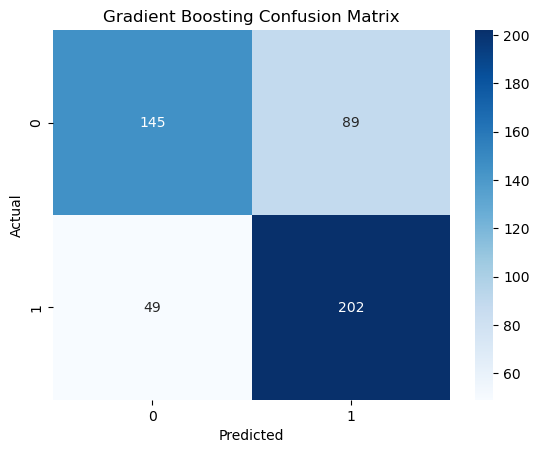

In [7]:
# Confusion matrix for XGB
cm_xgb = confusion_matrix(y_test, xgb_preds)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [8]:
### cross validation

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer

xgb_model_cv = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
fold_accuracies = []

for fold, (train_idx, val_idx) in enumerate(cv.split(X_train_scaled, y_train), 1):
    X_cv_train, X_cv_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_cv_train, y_cv_val = y_train[train_idx], y_train[val_idx]
    
    # Train and predict
    xgb_model_cv.fit(X_cv_train, y_cv_train)
    y_cv_pred = xgb_model_cv.predict(X_cv_val)
    
    # Calculate accuracy
    acc = accuracy_score(y_cv_val, y_cv_pred)
    fold_accuracies.append(acc)
    
    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    
print("\nMean Accuracy:", sum(fold_accuracies)/len(fold_accuracies))
print("Standard Deviation:", (sum((x - sum(fold_accuracies)/len(fold_accuracies))**2 for x in fold_accuracies) / len(fold_accuracies))**0.5)


/tmp/ipykernel_443164/1154400745.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_cv_train, y_cv_val = y_train[train_idx], y_train[val_idx]


Fold 1: Accuracy = 0.7268


/tmp/ipykernel_443164/1154400745.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_cv_train, y_cv_val = y_train[train_idx], y_train[val_idx]


Fold 2: Accuracy = 0.7113


/tmp/ipykernel_443164/1154400745.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_cv_train, y_cv_val = y_train[train_idx], y_train[val_idx]


Fold 3: Accuracy = 0.6856


/tmp/ipykernel_443164/1154400745.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_cv_train, y_cv_val = y_train[train_idx], y_train[val_idx]


Fold 4: Accuracy = 0.6546


/tmp/ipykernel_443164/1154400745.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_cv_train, y_cv_val = y_train[train_idx], y_train[val_idx]


Fold 5: Accuracy = 0.6907


/tmp/ipykernel_443164/1154400745.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_cv_train, y_cv_val = y_train[train_idx], y_train[val_idx]


Fold 6: Accuracy = 0.7062


/tmp/ipykernel_443164/1154400745.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_cv_train, y_cv_val = y_train[train_idx], y_train[val_idx]


Fold 7: Accuracy = 0.7113


/tmp/ipykernel_443164/1154400745.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_cv_train, y_cv_val = y_train[train_idx], y_train[val_idx]


Fold 8: Accuracy = 0.7371


/tmp/ipykernel_443164/1154400745.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_cv_train, y_cv_val = y_train[train_idx], y_train[val_idx]


Fold 9: Accuracy = 0.6580


/tmp/ipykernel_443164/1154400745.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_cv_train, y_cv_val = y_train[train_idx], y_train[val_idx]


Fold 10: Accuracy = 0.7461

Mean Accuracy: 0.7027856417926392
Standard Deviation: 0.02924657665307842


In [10]:
import joblib
filename = "GB_BinaryClassifier_10foldCV.joblib"
joblib.dump(xgb_model_cv, filename)


['GB_BinaryClassifier_10foldCV.joblib']